# Wyscout: Analysis of Denmark - Slovenia in Qualifier"

In [1]:
%load_ext autoreload
%autoreload 2

# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import json
import zipfile
from pathlib import Path
import os
import sys
from IPython.display import display

# specfic soccer analysis packages
from mplsoccer import Pitch, Sbopen, VerticalPitch

# load custom functions
from src.visualization import *

/Users/francoiscost/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Load data

In [2]:
match_id = "5414302"
df_events = pd.read_csv(f"./results/wyscout/{match_id}_df_events.csv", index_col=0)

pitch_length = 120
pitch_width = 80

### Plot values

| Vs : Kazakhstan | Vs : Denmark | Vs : N_Ireland |
|---|---|---|
|<img src="https://github.com/ngroggy/SoccerAnalytics/blob/main/notebooks/plots/3-tactical/long_passes_map_Kazakhstan.png?raw=true" align="center" height="350" width="600"/>|<img src="https://github.com/ngroggy/SoccerAnalytics/blob/main/notebooks/plots/3-tactical/long_passes_map_Denmark.png?raw=true" align="center" height="350" width="600"/>|<img src="https://github.com/ngroggy/SoccerAnalytics/blob/main/notebooks/plots/3-tactical/long_passes_map_N_Ireland.png?raw=true" align="center" height="350" width="600"/>|
| Vs : Finland | Vs : San_Marino | Vs : N_Ireland_2 |
|---|---|---|
|<img src="https://github.com/ngroggy/SoccerAnalytics/blob/main/notebooks/plots/3-tactical/long_passes_map_Finland.png?raw=true" align="center" height="350" width="600"/>|<img src="https://github.com/ngroggy/SoccerAnalytics/blob/main/notebooks/plots/3-tactical/long_passes_map_San_Marino.png?raw=true" align="center" height="350" width="600"/>|<img 

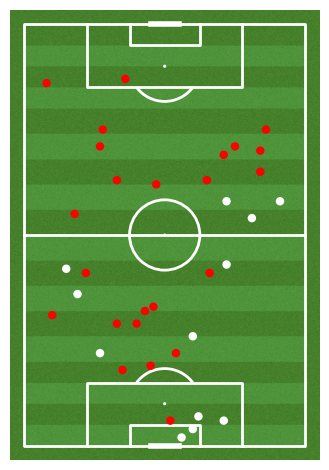

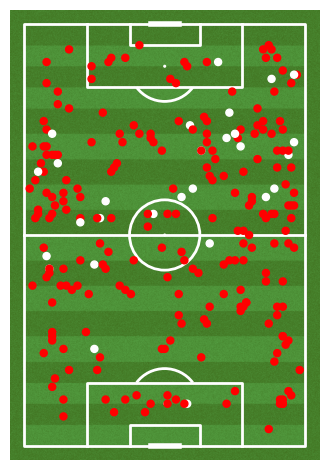

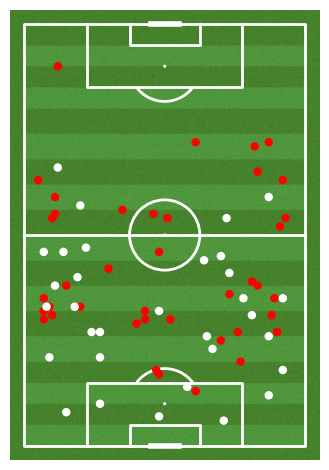

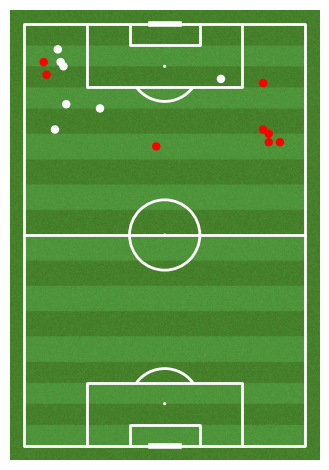

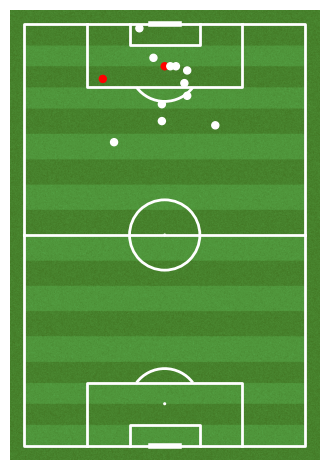

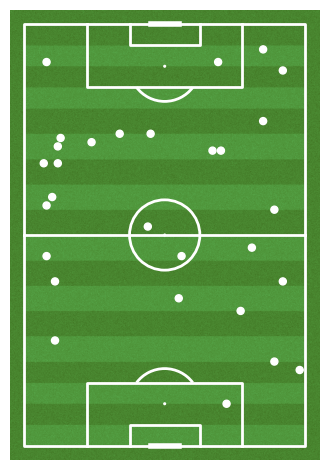

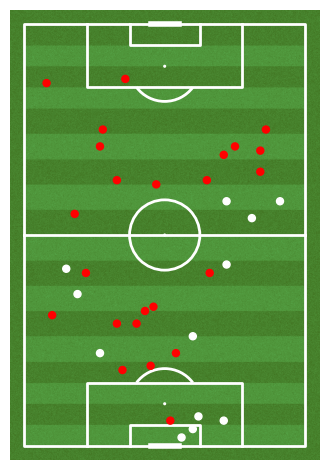

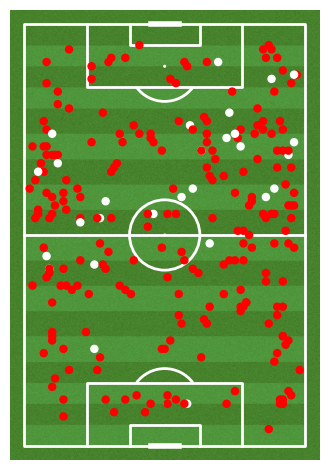

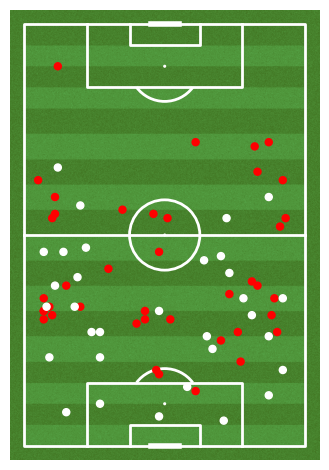

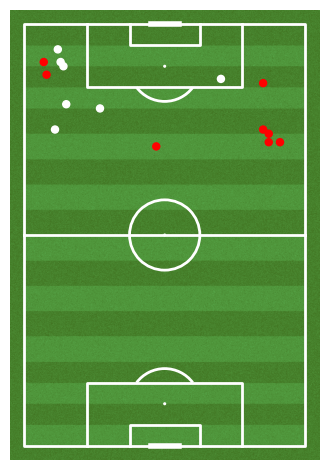

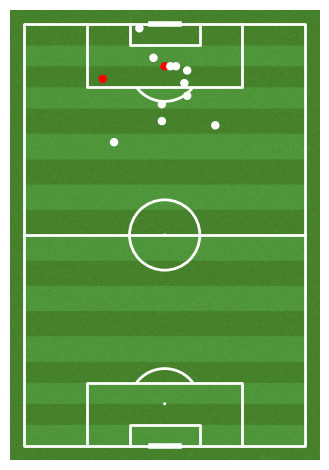

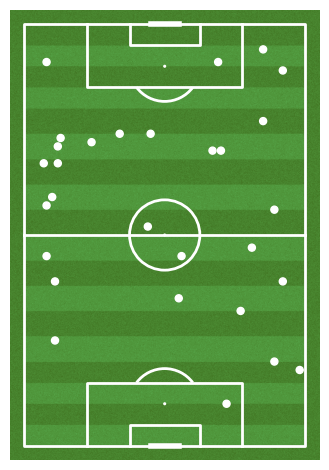

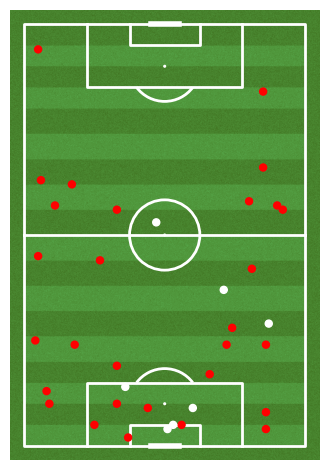

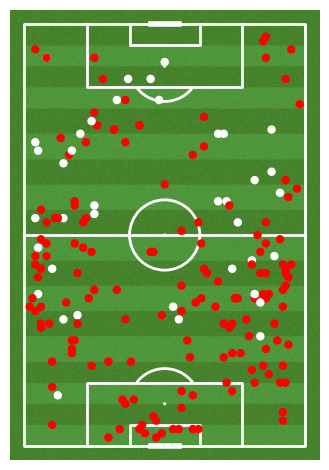

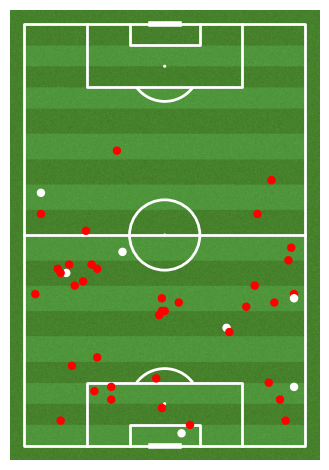

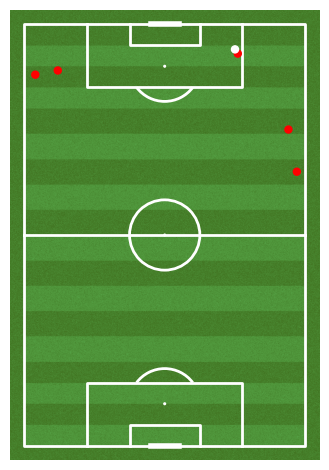

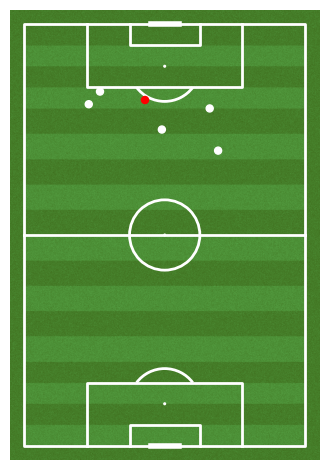

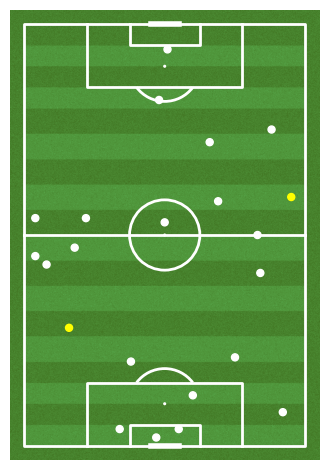

In [9]:
def intercept_color_funcion(entry):    
    color = "red"
    if 'loss' in entry['type.secondary']:
        color = "white"
    return color

def duel_color_function(entry):
    color = "red"
    if 'loss' in entry['type.secondary']:
        color = "white"
    return color

def long_passes_color_function(entry):
    color = "red"
    if 'loss' in entry['type.secondary']:
        color = "white"
    return color

def cross_color_function(entry):
    color = "red"
    if 'loss' in entry['type.secondary']:
        color = "white"
    return color

def shot_color_function(entry):
    goal=entry['shot.isGoal']
    color = "white"
    if goal:
        color = "red"
    return color

def fouls_color_function(entry):
    color = "white"
    if 'yellow_card' in entry['type.secondary']:
        color = "yellow"
    return color

def plot_values(type, against, values, color_function, plot_text = False):
    pitch = VerticalPitch(pitch_color='grass', line_color='white', stripe=True)

    fig, ax = pitch.draw()

    for i,entry in values.iterrows():
        #get the information
        x=entry['location.x']
        y=entry['location.y']
        goal=entry['shot.isGoal']
        team_name=entry['team.name']
        #set circlesize
        circleSize=1
        color = color_function(entry)
        # Plot England
        if (team_name=='Slovenia'):
            shotCircle=plt.Circle((y/100.0 * pitch_width, x/100.0 * pitch_length),circleSize,color=color)
            if plot_text:
                plt.text(y/100.0 * pitch_width-4, x/100.0 * pitch_length - 4,entry['player.name'])
            ax.add_patch(shotCircle)

    plt.savefig(f"plots/3-tactical/{type}_map_{against}.png", dpi=400,bbox_inches='tight')


data = [("Kazakhstan", "5414324"),("Denmark", "5414324"),("N_Ireland", "5414284")]
data2 = [("Finland", "5414260"),("San_Marino", "5414226"),("N_Ireland_2","5414203")]

for against, match_id in data:
    # Read data
    df_events = pd.read_csv(f"./results/wyscout/{match_id}_df_events.csv", index_col=0)

    # Save values
    plot_values("interception", against, df_events[df_events["type.primary"].str.contains('interception')], intercept_color_funcion)
    plot_values("duel", against, df_events[df_events["type.primary"].str.contains('duel')], duel_color_function)
    plot_values("long_passes", against, df_events[df_events["type.secondary"].str.contains('long_pass')], long_passes_color_function)
    plot_values("crosses", against, df_events[df_events["type.secondary"].str.contains('cross')], cross_color_function)
    plot_values("shots", against, df_events[~df_events["shot.isGoal"].isna()],shot_color_function)
    plot_values("fouls", against, df_events[df_events["type.secondary"].str.contains('foul')],fouls_color_function)



values = ["long_passes","crosses","shots","duel","interception","fouls"]
for type in values:
    head = "|"
    second = "|"
    links = "|"
    for against, match_id in data:
        head += f" Vs : {against} |"
        second += "---|"
        links += f"<img src=\"https://github.com/ngroggy/SoccerAnalytics/blob/main/notebooks/plots/3-tactical/{type}_map_{against}.png?raw=true\" align=\"center\" height=\"350\" width=\"600\"/>|"

    print(head)
    print(second)
    print(links)

    print()

    head = "|"
    second = "|"
    links = "|"
    for against, match_id in data2:
        head += f" Vs : {against} |"
        second += "---|"
        links += f"<img src=\"https://github.com/ngroggy/SoccerAnalytics/blob/main/notebooks/plots/3-tactical/{type}_map_{against}.png?raw=true\" align=\"center\" height=\"350\" width=\"600\"/>|"

    print(head)
    print(second)
    print(links)

    print("\n")
